{'expr': 'add(mul(add(square(logp), sub(tpsa, 292.0763894916694)), -0.0316324944192652), exp(add(vdw_vol, add(acc, -164.49964637487622))))', 'use_X': ['logp', 'tpsa', 'vdw_vol', 'acc']}
     arings  acc  don  a_heavy   logp  rbc  rings  tpsa    vdw_vol          mw
392       0    1    0        7  1.141    0      1  3.24  126.11688   99.177002
364       0    1    0        9  1.921    1      1  3.24  176.58276  192.099990
[[9.09543374e+00]
 [4.80764290e+05]]
480764.2897370135 1


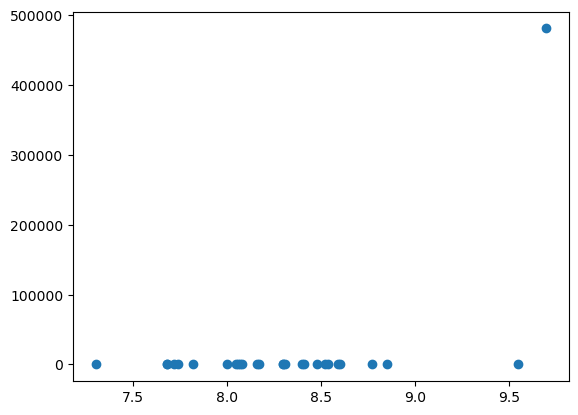

In [10]:
import pandas as pd
import numpy as np
from figp import LoadExpr
import json
from sklearn.model_selection import train_test_split

MMS_COLUMNS = ['chembl-id', 'pot.(log,Ki)', 'pot.(nMol,Ki)', 'aromatic_smiles', 'non_stereo_aromatic_smieles',
               'all-chembl-ids', 'no.-meas.', 'pref_name', 'accession', 'natoms',
               'core', 'sub', 'sub_carbon_replacement', 'arorings', 'a_acc',
               'a_don', 'a_heavy', 'logP(o/w)', 'RBC', 'rings',
               'TPSA', 'vdw_vol', 'Weight']
MMS_COLRENAME = {"arorings": "arings", "a_acc": "acc", "a_don": "don", "logP(o/w)": "logp", "RBC": "rbc",
                 "TPSA": "tpsa", "Weight": "mw", "pot.(log,Ki)":"pot"}
                 # RBC: Rotatable Bond Counts
MMS_FEATLIST = {'10': ["arings", "acc", "don", "a_heavy", "logp", "rbc", "rings", "tpsa", "vdw_vol", "mw"],
                '7' : ["arings", "acc", "don", "logp", "rbc", "tpsa", "mw"],
                '4' : ["logp", "rbc", "tpsa", "mw"],}
MMS_PROPERTY = "pot"
mms_featlist = MMS_FEATLIST['10']
d_rstate = 1

with open('result3/000_best_expr.json', 'rb') as f:
    best_expr = json.load(f)

print(best_expr)
df = pd.read_table("data/MMS/uniq/tid-10280-actives_90mms_sub-moedescriptors.tsv", index_col=0)
df = df.rename(columns=MMS_COLRENAME)
ndata = len(df.index)

X = df.loc[:, mms_featlist]
y = df.loc[:, MMS_PROPERTY]

rtrain=0.5
ntrain = int(rtrain*ndata)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ntrain, random_state=d_rstate)

expr = LoadExpr(best_expr['expr'])
y_train_pred_load = expr.predict(X_train)
y_test_pred_load  = expr.predict(X_test)

# print(y_train_pred_load)
print(X_test.iloc[0:2, :])
print(y_test_pred_load[0:2])

import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred_load)
print(y_test_pred_load.max(), y_test_pred_load.argmax())
# sum(np.array(y_train_pred).reshape(-1, 1) - y_train_pred_load), sum(np.array(y_test_pred).reshape(-1, 1) - y_test_pred_load)


# model = LoadExpr("-0.0316324944192652 \cdot logp^2 - 0.0316324944192652 \cdot tpsa + 3.62002278745547e-72 \cdot exp(acc + vdw_vol) + 9.23910476059436")
# model.predict()

In [12]:
import math

math.exp(126.11688+(1-164.49964637487622))

5.819301317646213e-17

In [ ]:
"""view png files"""
